### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
# Question 1: Import the data file named meal_demand_train.csv that was provided
# with this checkpoint. Print the number of records in this dataset in the
# output.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print('Packages Imported')

df = pd.read_csv('/Users/liber/OneDrive/Documents/Junior Year/IS Junior Core/IS 455 Python Machine Learning/Forecasting/meal_demand_train.csv')

print(len(df))



Packages Imported
456548


In [198]:
# Question 2: Notice that the data in this file does not use a timestamp to indicate the period. Instead there
#  is a simple integer to indicate the week each row refers to (e.g. 1, 2, 3...). We will keep the data in this 
# order for simplicity. However, we want to aggregate the data for an overall forecast across all 
# locations (i.e. center_ids), meals (i.e. meal_ids). Therefore, create a new dataframe called df_agg that 
# is a grouped version of the original dataframe with all entries for the same week number grouped together
# in a single row. create aggregate columns using the functions:

# 'checkout_price': 'mean'
# 'emailer_for_promotion': 'mean'
# 'homepage_featured': 'mean'
# 'category': 'nunique'
# 'cuisine': 'count'
# 'op_area': 'mean'
# 'num_orders': 'sum'
# All other columns can be ignored and left out of the new df_agg DataFrame. The pandas documentation found here: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html provides everything you need to accomplish this task. 

# Print out the last record (Week 145) of this df_agg DataFrame and then print the first 10 records of the DataFrame

df_agg = df.groupby(by=['week']).agg({'checkout_price': 'mean', 
                                        'emailer_for_promotion': 'mean', 
                                        'homepage_featured': 'mean', 
                                        'category': 'nunique',
                                        'cuisine': 'count',
                                        'op_area': 'mean',
                                        'num_orders': 'sum'}) 

print(df_agg.loc[145])

df_agg[0:10]



checkout_price              345.015912
emailer_for_promotion         0.045594
homepage_featured             0.060894
category                     14.000000
cuisine                    3268.000000
op_area                       4.092656
num_orders               671926.000000
Name: 145, dtype: float64


,checkout_price,emailer_for_promotion,homepage_featured,category,cuisine,op_area,num_orders
week,,,,,,,
1,330.530205,0.122177,0.141684,12,2922,4.079877,792261
2,323.926944,0.214434,0.177486,12,2896,4.085014,787084
3,327.202580,0.035874,0.109003,12,2899,4.078682,695262
4,330.160502,0.000000,0.101073,12,2889,4.087747,743529
5,315.194676,0.117873,0.162994,12,2859,4.077824,1198675
6,320.773018,0.042164,0.158468,12,2846,4.084294,947288
7,337.139313,0.054025,0.104472,12,2795,4.093023,934803
8,330.035815,0.082915,0.121680,12,2786,4.096447,670518
9,323.627001,0.069026,0.128591,12,2854,4.080413,723243


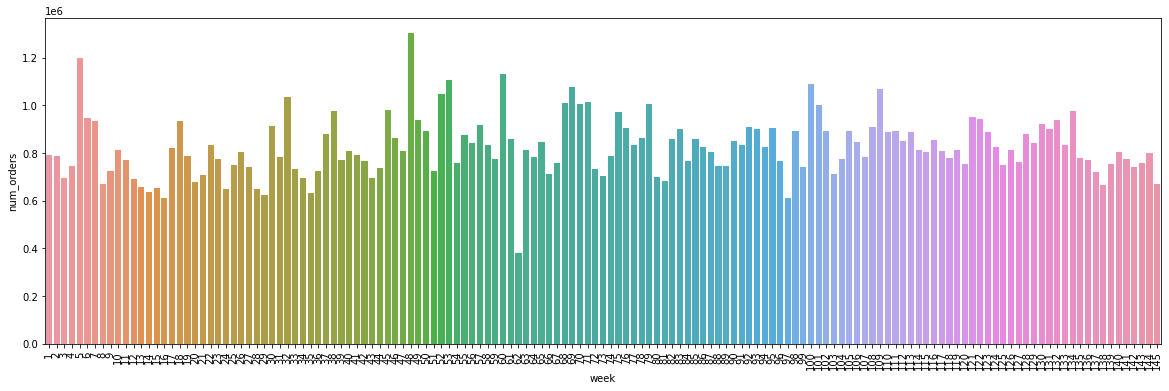

In [199]:
# Question 3: Print either a bar or line chart of some type to visualize num_orders over time (i.e. week). You are welcome to use any labels and title you want (or none at all). 

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
sns.barplot(x=df_agg.index, y="num_orders", data=df_agg, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [200]:
# Question 4: Create a first order moving average (MA) model based on num_orders. Print out the model results summary.

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_agg.num_orders, order=(0,0,1))

model = model.fit()

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1901.879
Date:                Sat, 19 Feb 2022   AIC                           3809.758
Time:                        20:48:08   BIC                           3818.688
Sample:                             0   HQIC                          3813.387
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.245e+05   1.33e+04     62.123      0.000    7.99e+05    8.51e+05
ma.L1          0.2864      0.086      3.336      0.001       0.118       0.455
sigma2      1.472e+10      0.052   2.84e+11      0.0

c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  


In [201]:
# Question 5: Create a first-order (i.e. lag=1) auto-regressive model using the AutoReg() object in statsmodels.api. Include a constant and a trend term, but not a seasonal term. Print a model summary.
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_agg.num_orders, lags=[1],trend='ct',seasonal=False) 
model = model.fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             num_orders   No. Observations:                  145
Model:                     AutoReg(1)   Log Likelihood               -1889.192
Method:               Conditional MLE   S.D. of innovations         120626.041
Date:                Sat, 19 Feb 2022   AIC                           3786.384
Time:                        20:48:08   BIC                           3798.263
Sample:                             1   HQIC                          3791.211
                                  145                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.92e+05   6.78e+04      8.730      0.000    4.59e+05    7.25e+05
trend           223.0063    243.727      0.915      0.360    -254.691     700.703
num_orders.L1     0.2621      0.081     

c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  


In [202]:
# Question 6: Create a seasonal autoregressive model integrated with a moving average and include all of the covariates we created in df_agg. Make both the auto-regression and moving average terms first-order. Do not include any differencing. Include a 12 month seasonality. For that seasonality, include a 1 period differencing, but do not include any auto-regression or moving average terms. Print the model results summary.
from statsmodels.tsa.statespace.sarimax import SARIMAX

ex = df_agg.drop(columns = ['num_orders'])

model = SARIMAX(df_agg.num_orders,exog=ex, order=(1,0,1), seasonal_order=(0,1,0,12))
model = model.fit(disp=False)

print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          num_orders   No. Observations:                  145
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood               -1754.730
Date:                             Sat, 19 Feb 2022   AIC                           3527.460
Time:                                     20:48:08   BIC                           3553.473
Sample:                                          0   HQIC                          3538.031
                                             - 145                                         
Covariance Type:                               opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
checkout_price          -49.5651   1339.685     -0.037      0.970   -2675.300    257

c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  


In [203]:
# Question 7: Import the data set meal_demand_forecast.csv into a new DataFrame. Aggregate the dataset into weeks in the exact same way you did above with the df_agg DataFrame. The only difference is that this new DataFrame will not include a sum of num_orders. 

# Use this DataFrame as the exogenous features required to calculate a num_orders forecast for each of the weeks in this DataFrame. HINT: as you do this, remember that the .predict(startindex, endindex, exogenous_features) method is index-based and not length-based. As a result, you want to predict out to length - 1 of the new DataFrame you just aggregated.

df_forecast = pd.read_csv('/Users/liber/OneDrive/Documents/Junior Year/IS Junior Core/IS 455 Python Machine Learning/Forecasting/meal_demand_forecast.csv')

df_forecast_agg = df_forecast.groupby(by=['week']).agg({'checkout_price': 'mean', 
                                        'emailer_for_promotion': 'mean', 
                                        'homepage_featured': 'mean', 
                                        'category': 'nunique',
                                        'cuisine': 'count',
                                        'op_area': 'mean'}) 

forecast_sarimax = model.predict(len(df_agg) + 1, len(df_agg) + len(df_forecast_agg) - 1, exog= df_forecast_agg)

forecast_sarimax

c:\Users\liber\Documents\byu-venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # First, if we were given an index, check that it's the right size and


146    724585.884930
147    784155.881430
148    794220.864930
149    789259.616805
150    824195.459822
151    763261.911652
152    735027.506519
153    691067.456499
154    641892.580827
Name: predicted_mean, dtype: float64

<AxesSubplot:>

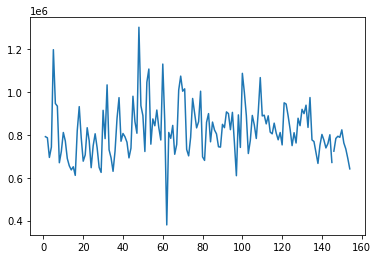

In [204]:
# Question 8: Add those prediction into a new column titled, 'num_orders' in the aggregated DataFrame you just created for the meal_demand_forecast.csv data. Append this DataFrame onto the original aggregated DataFrame based on the meal_demand_train.csv data. The columns should line up so that the result is a single DataFrame with weeks 1 - 154 (do not worry about Week 155). Create a Pandas line plot on the num_orders column so that we can see the original data together with the predictions.

df_forecast['num_orders'] = forecast_sarimax

df_agg = df_agg.append(df_forecast)
df_agg

df_agg.num_orders.plot()